In [99]:
import h5py
import numpy as np
import time
import pandas as pd
%matplotlib inline
#%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#start_time = time.time()


#for value in f.values():
#    print(value)
#for key in f.keys():
#    print(key)

In [100]:
f = h5py.File('/Users/spencershortt/TNG2019/morphs_g.hdf5','r+')
#print(list(f["flag"]))

subfind_id=np.array(f["subfind_id"])
flag=np.array(f["flag"])
flag_sersic=np.array(f["flag_sersic"])
concentration=np.array(f["concentration"])
gini=np.array(f["gini"])
m20=np.array(f["m20"])
gini_m20_bulge=np.array(f["gini_m20_bulge"])
gini_m20_merger=np.array(f["gini_m20_merger"])
r20=np.array(f["r20"])
sersic_n=np.array(f["sersic_n"])

In [101]:
#print(np.array([1,2,3]).shape)
#print(gini.shape)
#print(type(subfind_id[0]))
#print(gini[0])

In [102]:
df=pd.DataFrame([subfind_id,gini, m20, concentration, flag] ).transpose()
df.columns=['id','gini',"m20","concentration","flag"]
df["label"]=""
df.tail()



id      gini       m20  concentration  flag label
12530  704187.0  0.517132 -1.793419       2.897814   0.0      
12531  719337.0  0.544473 -1.996610       3.281157   0.0      
12532  727485.0  0.539991 -1.821634       2.973282   0.0      
12533  738596.0  0.569533 -1.894974       3.072260   0.0      
12534  752194.0  0.543225 -1.888321       2.986496   0.0

In [103]:
#LABELING FROM https://arxiv.org/pdf/1809.08239.pdf SECTION 4.4.3

flag_condition=df.flag.values==0
merger_line_condition=df.gini.values>-.14*df.m20.values + .33
early_type_condition=(df.gini.values>.14*df.m20.values+.80 ) & ~merger_line_condition
late_type_condition= ~merger_line_condition & ~early_type_condition 

df["label"]=df["label"].where(~(merger_line_condition & flag_condition),0)#Merger
df["label"]=df["label"].where(~(early_type_condition & flag_condition),1)#Elliptical
df["label"]=df["label"].where(~(late_type_condition & flag_condition),2) #Spiral

df=df.drop(df[df["flag"]==1].index)



In [104]:
test=pd.DataFrame([[1,2,3],[2,3,4]]).transpose()
test.columns=["w","d"]
test=test.drop(test[test["d"]==3].index)
test


w  d
0  1  2
2  3  4

In [105]:
df[df["m20"]<-10]

Empty DataFrame
Columns: [id, gini, m20, concentration, flag, label]
Index: []

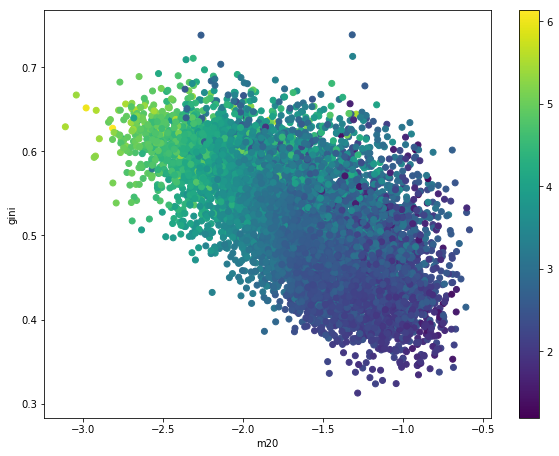

In [106]:
fig, axes=plt.subplots(1,1,figsize=(10,7.5))
scatter=axes.scatter(df["m20"],df["gini"], c=df["concentration"])
axes.set_xlabel("m20")
axes.set_ylabel("gini")
axes.invert_xaxis
fig.colorbar(scatter, ax=axes)


In [107]:
df.head()

id      gini       m20  concentration  flag label
0  0.0  0.614704 -2.752232       4.527077   0.0     1
1  1.0  0.574363 -2.220317       3.663501   0.0     1
2  2.0  0.647357 -2.288265       4.597688   0.0     1
3  3.0  0.513784 -2.029409       3.567780   0.0     2
5  5.0  0.573778 -2.596948       4.938205   0.0     1

In [108]:
tng=pd.read_csv('/Users/spencershortt/TNG2019/TNG_100_ml_features.txt', sep="\t")
tng["sSFR"]=tng.sfr.values/tng.mass_stars.values
tng.tail()

id  mass_stars       sfr   GasMass  gas_metallicity  \
8859  664639    0.407193  0.100552  0.263200         0.025450   
8860  667344    0.458927  0.017436  0.074005         0.034569   
8861  667804    0.430813  0.000000  0.000000         0.000000   
8862  679293    0.467850  0.017507  0.040991         0.041285   
8863  719337    0.445470  0.000000  0.000000         0.000000   

      star_metallicity  sfr_in_halfrad  mass_in_halfrad_stars  \
8859          0.018212        0.100552               0.203582   
8860          0.018505        0.017436               0.229408   
8861          0.017257        0.000000               0.215368   
8862          0.016829        0.017507               0.233886   
8863          0.015373        0.000000               0.222684   

      mass_in_halfrad_gas  star_metallicity_in_halfrad  \
8859             0.019780                     0.021576   
8860             0.006034                     0.021392   
8861             0.000000                     0.020248   
8862             0.009021                     0.020072   
8863             0.000000                     0.018142   

      gas_metallicity_in_halfrad   u_band   b_band   v_band   k_band   g_band  \
8859                    0.032515 -18.0430 -18.1668 -18.8447 -21.6218 -18.5457   
8860                    0.035526 -17.3678 -17.7672 -18.6201 -21.5680 -18.2173   
8861                    0.000000 -17.3122 -17.7089 -18.5641 -21.4251 -18.1609   
8862                    0.045556 -17.8698 -18.1975 -18.9978 -21.7740 -18.6280   
8863                    0.000000 -17.5457 -17.9244 -18.7636 -21.5916 -18.3708   

       r_band   i_band   z_band      sSFR  
8859 -19.1346 -19.4460 -19.6752  0.246939  
8860 -18.9573 -19.3139 -19.5717  0.037992  
8861 -18.8994 -19.2479 -19.4908  0.000000  
8862 -19.3151 -19.6379 -19.8612  0.037421  
8863 -19.0923 -19.4302 -19.6667  0.000000

In [109]:
df=df[df.id.isin(tng.id.values)]
df.head()

id      gini       m20  concentration  flag label
0  0.0  0.614704 -2.752232       4.527077   0.0     1
1  1.0  0.574363 -2.220317       3.663501   0.0     1
2  2.0  0.647357 -2.288265       4.597688   0.0     1
3  3.0  0.513784 -2.029409       3.567780   0.0     2
5  5.0  0.573778 -2.596948       4.938205   0.0     1

In [110]:
tng=tng[tng.id.isin(df.id.values)]
tng.head()

id  mass_stars        sfr    GasMass  gas_metallicity  star_metallicity  \
0   0    251.0160   2.227190  3900.6000         0.007718          0.028622   
1   1     37.8526   0.413285   444.5590         0.008247          0.021265   
2   2     42.4824  17.392200    12.6116         0.011213          0.025407   
3   3     11.6209   5.079380    16.9682         0.020788          0.023964   
5   5     13.0163   0.886559     2.0604         0.016919          0.023866   

   sfr_in_halfrad  mass_in_halfrad_stars  mass_in_halfrad_gas  \
0        0.000000              125.50800            13.531100   
1        0.049075               18.92620             0.201578   
2        0.718051               21.24120             0.319853   
3        0.000000                5.81043             0.015982   
5        0.003248                6.50807             0.030289   

   star_metallicity_in_halfrad  gas_metallicity_in_halfrad   u_band   b_band  \
0                     0.032578                    0.007995 -24.1033 -24.5115   
1                     0.023624                    0.011339 -22.1142 -22.4991   
2                     0.028119                    0.012482 -23.0677 -23.1291   
3                     0.027105                    0.026441 -21.9708 -22.0503   
5                     0.027354                    0.016969 -21.0785 -21.4155   

    v_band   k_band   g_band   r_band   i_band   z_band      sSFR  
0 -25.3760 -28.3094 -24.9662 -25.7158 -26.0726 -26.3286  0.008873  
1 -23.3480 -26.2491 -22.9476 -23.6833 -24.0339 -24.2839  0.010918  
2 -23.7847 -26.5456 -23.4980 -24.0692 -24.3691 -24.5975  0.409398  
3 -22.6820 -25.3858 -22.4122 -22.9552 -23.2390 -23.4537  0.437090  
5 -22.2306 -25.1326 -21.8497 -22.5584 -22.9041 -23.1542  0.068111

In [111]:
tng.tail()

id  mass_stars       sfr   GasMass  gas_metallicity  \
8859  664639    0.407193  0.100552  0.263200         0.025450   
8860  667344    0.458927  0.017436  0.074005         0.034569   
8861  667804    0.430813  0.000000  0.000000         0.000000   
8862  679293    0.467850  0.017507  0.040991         0.041285   
8863  719337    0.445470  0.000000  0.000000         0.000000   

      star_metallicity  sfr_in_halfrad  mass_in_halfrad_stars  \
8859          0.018212        0.100552               0.203582   
8860          0.018505        0.017436               0.229408   
8861          0.017257        0.000000               0.215368   
8862          0.016829        0.017507               0.233886   
8863          0.015373        0.000000               0.222684   

      mass_in_halfrad_gas  star_metallicity_in_halfrad  \
8859             0.019780                     0.021576   
8860             0.006034                     0.021392   
8861             0.000000                     0.020248   
8862             0.009021                     0.020072   
8863             0.000000                     0.018142   

      gas_metallicity_in_halfrad   u_band   b_band   v_band   k_band   g_band  \
8859                    0.032515 -18.0430 -18.1668 -18.8447 -21.6218 -18.5457   
8860                    0.035526 -17.3678 -17.7672 -18.6201 -21.5680 -18.2173   
8861                    0.000000 -17.3122 -17.7089 -18.5641 -21.4251 -18.1609   
8862                    0.045556 -17.8698 -18.1975 -18.9978 -21.7740 -18.6280   
8863                    0.000000 -17.5457 -17.9244 -18.7636 -21.5916 -18.3708   

       r_band   i_band   z_band      sSFR  
8859 -19.1346 -19.4460 -19.6752  0.246939  
8860 -18.9573 -19.3139 -19.5717  0.037992  
8861 -18.8994 -19.2479 -19.4908  0.000000  
8862 -19.3151 -19.6379 -19.8612  0.037421  
8863 -19.0923 -19.4302 -19.6667  0.000000

In [112]:
df.tail()

id      gini       m20  concentration  flag label
12499  664639.0  0.478197 -1.729032       2.658397   0.0     2
12503  667344.0  0.490282 -1.739830       2.625477   0.0     2
12504  667804.0  0.561515 -2.041888       3.583573   0.0     1
12513  679293.0  0.592899 -2.016339       3.557702   0.0     1
12531  719337.0  0.544473 -1.996610       3.281157   0.0     1

In [113]:
#df=df.join(tng,lsuffix='', rsuffix='_2')
#df=df.drop('id_2',axis=1)




#df=pd.concat([df, tng]).reset_index(drop=True)
df.head()

id      gini       m20  concentration  flag label
0  0.0  0.614704 -2.752232       4.527077   0.0     1
1  1.0  0.574363 -2.220317       3.663501   0.0     1
2  2.0  0.647357 -2.288265       4.597688   0.0     1
3  3.0  0.513784 -2.029409       3.567780   0.0     2
5  5.0  0.573778 -2.596948       4.938205   0.0     1

In [114]:
#df.drop('id_2',axis=1).head()
df.tail()

id      gini       m20  concentration  flag label
12499  664639.0  0.478197 -1.729032       2.658397   0.0     2
12503  667344.0  0.490282 -1.739830       2.625477   0.0     2
12504  667804.0  0.561515 -2.041888       3.583573   0.0     1
12513  679293.0  0.592899 -2.016339       3.557702   0.0     1
12531  719337.0  0.544473 -1.996610       3.281157   0.0     1

In [115]:
df.shape


(8252, 6)

In [116]:
tng.shape

(8252, 20)

In [117]:
df=df.merge(tng)

In [118]:
df.tail()

id      gini       m20  concentration  flag label  mass_stars  \
8247  664639  0.478197 -1.729032       2.658397   0.0     2    0.407193   
8248  667344  0.490282 -1.739830       2.625477   0.0     2    0.458927   
8249  667804  0.561515 -2.041888       3.583573   0.0     1    0.430813   
8250  679293  0.592899 -2.016339       3.557702   0.0     1    0.467850   
8251  719337  0.544473 -1.996610       3.281157   0.0     1    0.445470   

           sfr   GasMass  gas_metallicity    ...     \
8247  0.100552  0.263200         0.025450    ...      
8248  0.017436  0.074005         0.034569    ...      
8249  0.000000  0.000000         0.000000    ...      
8250  0.017507  0.040991         0.041285    ...      
8251  0.000000  0.000000         0.000000    ...      

      gas_metallicity_in_halfrad   u_band   b_band   v_band   k_band   g_band  \
8247                    0.032515 -18.0430 -18.1668 -18.8447 -21.6218 -18.5457   
8248                    0.035526 -17.3678 -17.7672 -18.6201 -21.5680 -18.2173   
8249                    0.000000 -17.3122 -17.7089 -18.5641 -21.4251 -18.1609   
8250                    0.045556 -17.8698 -18.1975 -18.9978 -21.7740 -18.6280   
8251                    0.000000 -17.5457 -17.9244 -18.7636 -21.5916 -18.3708   

       r_band   i_band   z_band      sSFR  
8247 -19.1346 -19.4460 -19.6752  0.246939  
8248 -18.9573 -19.3139 -19.5717  0.037992  
8249 -18.8994 -19.2479 -19.4908  0.000000  
8250 -19.3151 -19.6379 -19.8612  0.037421  
8251 -19.0923 -19.4302 -19.6667  0.000000  

[5 rows x 25 columns]

In [119]:
df.to_csv('/Users/spencershortt/TNG2019/machine_learning_tng100_2.txt', sep="\t")

In [120]:

#df[['mass_stars','label']][df.label.values==0]
df.columns

Index(['id', 'gini', 'm20', 'concentration', 'flag', 'label', 'mass_stars',
       'sfr', 'GasMass', 'gas_metallicity', 'star_metallicity',
       'sfr_in_halfrad', 'mass_in_halfrad_stars', 'mass_in_halfrad_gas',
       'star_metallicity_in_halfrad', 'gas_metallicity_in_halfrad', 'u_band',
       'b_band', 'v_band', 'k_band', 'g_band', 'r_band', 'i_band', 'z_band',
       'sSFR'],
      dtype='object')

In [133]:
figure=pd.plotting.scatter_matrix(df[['gini','m20','concentration']],
                                  c=df['label'],figsize=(15, 15),
                           marker='o', hist_kwds={'bins': 20}, s=60,
                           alpha=.8)

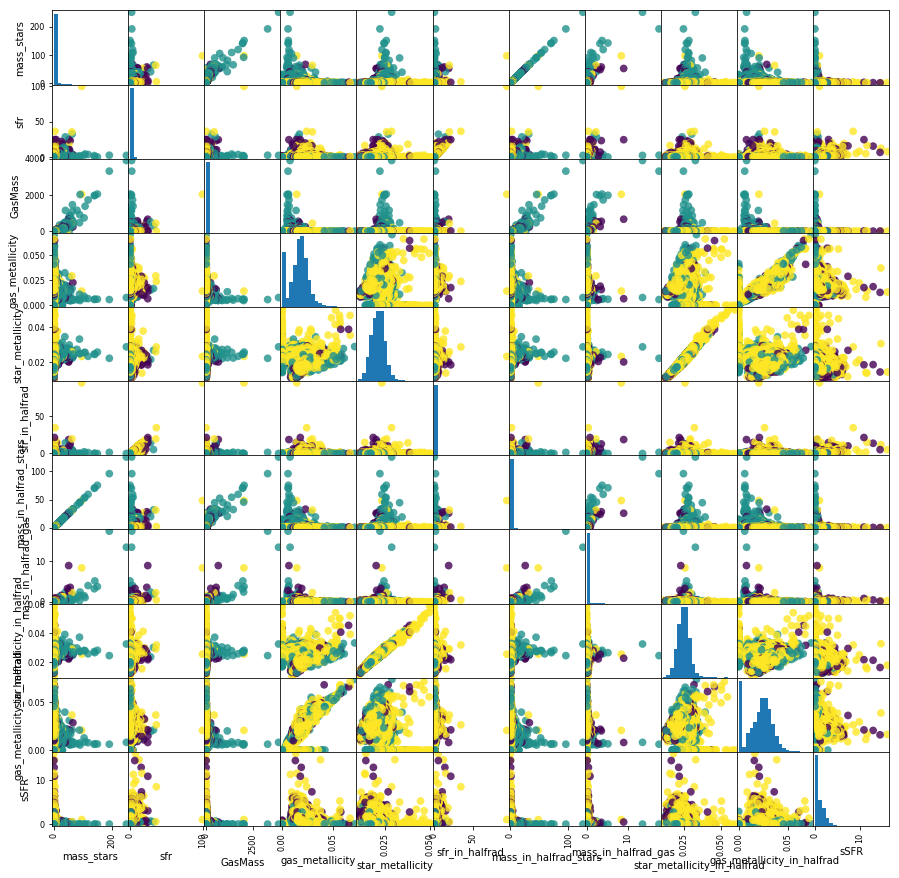

In [122]:
figure=pd.plotting.scatter_matrix(df.drop(["id",'flag','label','gini','m20','concentration','u_band',
       'b_band', 'v_band', 'k_band', 'g_band', 'r_band', 'i_band', 'z_band'],axis=1), c=df['label'],figsize=(15, 15),
                           marker='o', hist_kwds={'bins': 20}, s=60,
                           alpha=.8)

#observe_pairs.drop(["id","pos_x","pos_y","pos_z","vel_x","vel_y","vel_z"]

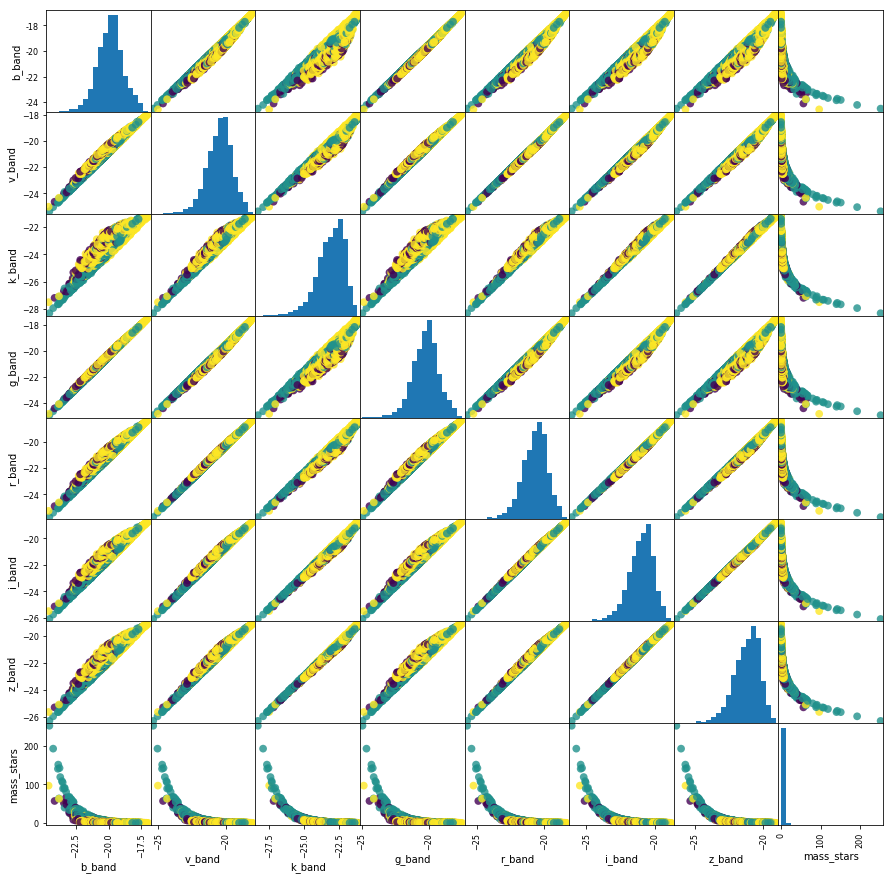

In [123]:
figure=pd.plotting.scatter_matrix(df[['b_band', 'v_band', 'k_band', 'g_band', 'r_band', 'i_band', 'z_band','mass_stars']], c=df['label'],figsize=(15, 15),
                           marker='o', hist_kwds={'bins': 20}, s=60,
                           alpha=.8)


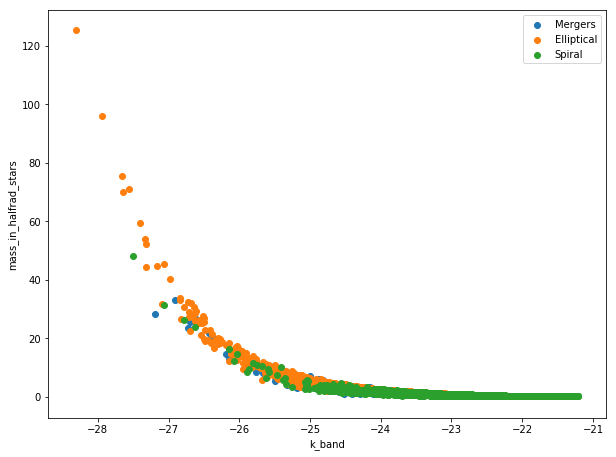

In [124]:
fig, axes=plt.subplots(1,1,figsize=(10,7.5))
#axes.scatter(df["mass_stars"], df["sSFR"],c=df["label"])
axes.scatter(df["k_band"][df.label.values==0], df["mass_in_halfrad_stars"][df.label.values==0],label="Mergers")
axes.scatter(df["k_band"][df.label.values==1], df["mass_in_halfrad_stars"][df.label.values==1],label="Elliptical")
axes.scatter(df["k_band"][df.label.values==2], df["mass_in_halfrad_stars"][df.label.values==2],label="Spiral")

axes.set_xlabel("k_band")
axes.set_ylabel("mass_in_halfrad_stars")
#axes.invert_xaxis
axes.legend()
#axes.legend(['0','1','2'])
#fig.colorbar(scatter, ax=axes)

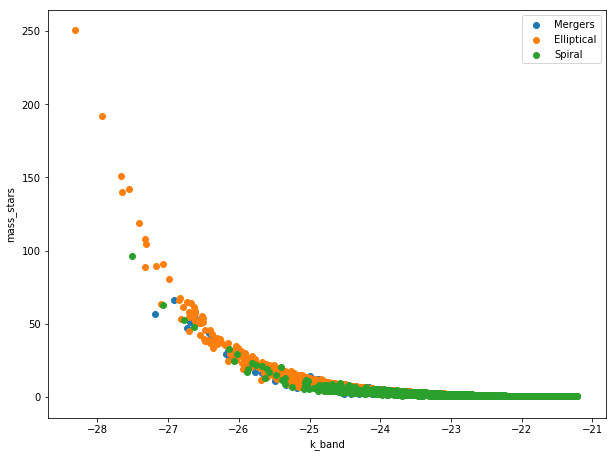

In [125]:
fig, axes=plt.subplots(1,1,figsize=(10,7.5))
#axes.scatter(df["mass_stars"], df["sSFR"],c=df["label"])
axes.scatter(df["k_band"][df.label.values==0], df["mass_stars"][df.label.values==0],label="Mergers")
axes.scatter(df["k_band"][df.label.values==1], df["mass_stars"][df.label.values==1],label="Elliptical")
axes.scatter(df["k_band"][df.label.values==2], df["mass_stars"][df.label.values==2],label="Spiral")

axes.set_xlabel("k_band")
axes.set_ylabel("mass_stars")
#axes.invert_xaxis
axes.legend()
#axes.legend(['0','1','2'])
#fig.colorbar(scatter, ax=axes)

In [126]:
fig, axes=plt.subplots(1,1,figsize=(10,7.5))
#axes.scatter(df["mass_stars"], df["sSFR"],c=df["label"])
axes.scatter(df["k_band"][df.label.values==0], df["sfr"][df.label.values==0],label="Mergers")
axes.scatter(df["k_band"][df.label.values==1], df["sfr"][df.label.values==1],label="Elliptical")
axes.scatter(df["k_band"][df.label.values==2], df["sfr"][df.label.values==2],label="Spiral")

axes.set_xlabel("k_band")
axes.set_ylabel("sfr")
#axes.invert_xaxis
axes.legend()

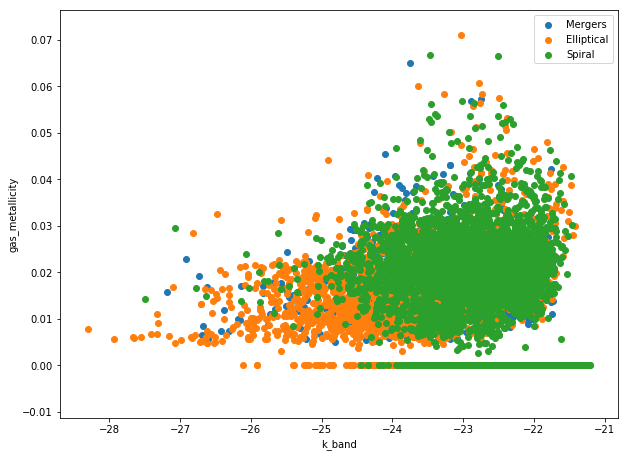

In [127]:
fig, axes=plt.subplots(1,1,figsize=(10,7.5))
#axes.scatter(df["mass_stars"], df["sSFR"],c=df["label"])
axes.scatter(df["k_band"][df.label.values==0], df["gas_metallicity"][df.label.values==0],label="Mergers")
axes.scatter(df["k_band"][df.label.values==1], df["gas_metallicity"][df.label.values==1],label="Elliptical")
axes.scatter(df["k_band"][df.label.values==2], df["gas_metallicity"][df.label.values==2],label="Spiral")

axes.set_xlabel("k_band")
axes.set_ylabel("gas_metallicity")
#axes.invert_xaxis
axes.legend()

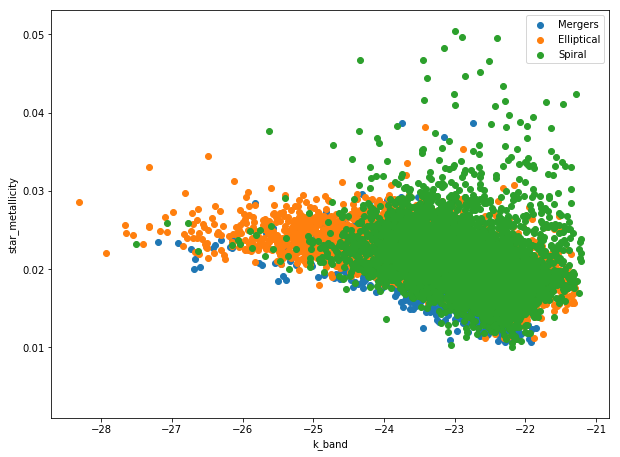

In [128]:
fig, axes=plt.subplots(1,1,figsize=(10,7.5))
#axes.scatter(df["mass_stars"], df["sSFR"],c=df["label"])
axes.scatter(df["k_band"][df.label.values==0], df["star_metallicity"][df.label.values==0],label="Mergers")
axes.scatter(df["k_band"][df.label.values==1], df["star_metallicity"][df.label.values==1],label="Elliptical")
axes.scatter(df["k_band"][df.label.values==2], df["star_metallicity"][df.label.values==2],label="Spiral")

axes.set_xlabel("k_band")
axes.set_ylabel("star_metallicity")
#axes.invert_xaxis
axes.legend()

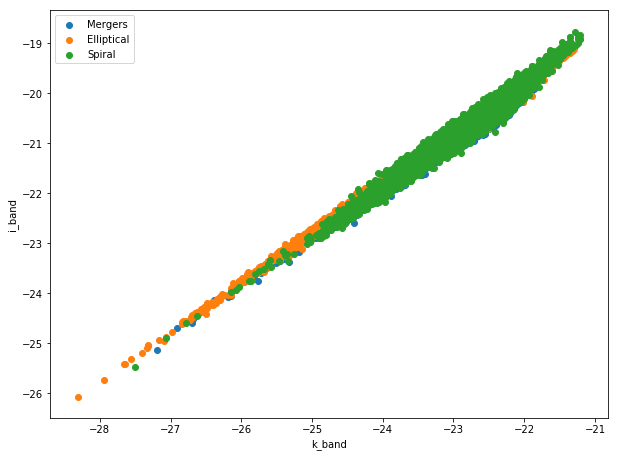

In [129]:
fig, axes=plt.subplots(1,1,figsize=(10,7.5))
#axes.scatter(df["mass_stars"], df["sSFR"],c=df["label"])
axes.scatter(df["k_band"][df.label.values==0], df["i_band"][df.label.values==0],label="Mergers")
axes.scatter(df["k_band"][df.label.values==1], df["i_band"][df.label.values==1],label="Elliptical")
axes.scatter(df["k_band"][df.label.values==2], df["i_band"][df.label.values==2],label="Spiral")

axes.set_xlabel("k_band")
axes.set_ylabel("i_band")
#axes.invert_xaxis
axes.legend()

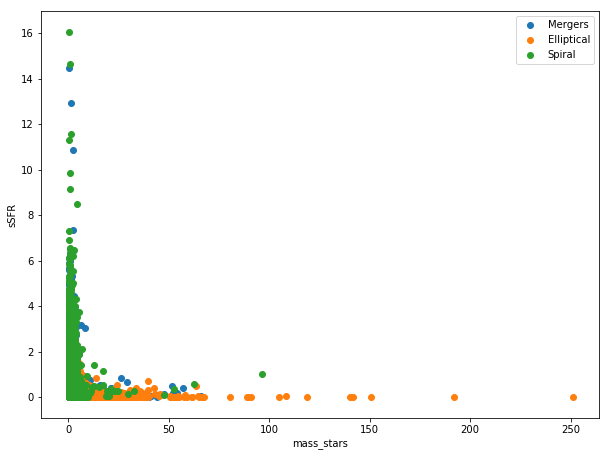

In [130]:
fig, axes=plt.subplots(1,1,figsize=(10,7.5))
#axes.scatter(df["mass_stars"], df["sSFR"],c=df["label"])
axes.scatter(df["mass_stars"][df.label.values==0], df["sSFR"][df.label.values==0],label="Mergers")
axes.scatter(df["mass_stars"][df.label.values==1], df["sSFR"][df.label.values==1],label="Elliptical")
axes.scatter(df["mass_stars"][df.label.values==2], df["sSFR"][df.label.values==2],label="Spiral")

axes.set_xlabel("mass_stars")
axes.set_ylabel("sSFR")
#axes.invert_xaxis
axes.legend()

In [131]:
#%matplotlib notebook


In [132]:
threedee2 = plt.figure().gca(projection='3d')
threedee2.scatter(df["mass_stars"][df.label.values==0], df["sSFR"][df.label.values==0],df["k_band"][df.label.values==0])
threedee2.scatter(df["mass_stars"][df.label.values==1], df["sSFR"][df.label.values==1],df["k_band"][df.label.values==1])
threedee2.scatter(df["mass_stars"][df.label.values==2], df["sSFR"][df.label.values==2],df["k_band"][df.label.values==2])
threedee2.set_xlabel("mass_stars")
threedee2.set_ylabel("sSFR")
threedee2.set_zlabel("k_band")
plt.show()